This is an attempt to analyze Amazon consumer reviews (dataset: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products?select=1429_1.csv)



In [1]:
#reading data
import pandas as pd
df = pd.read_csv('datasets/1429_1.csv', encoding='utf-8', header=0)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [2]:
# As the dataset doesn't have a target column, I will create one 
#by assuming reviews with score less than 3 are negative, and the rest is positive.

def polarity(x):
    if x < 3:
        return 0
    else:
        return 1
df["reviews.rating"] = df["reviews.rating"].map(polarity) #Map all the scores as the function polarity i.e. positive or negative
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


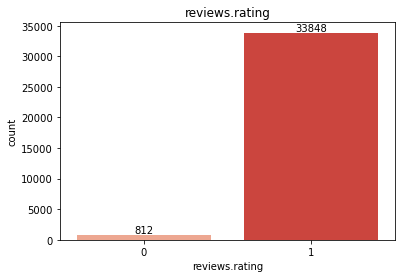

In [3]:
#The dataset has imbalanced data (one of the classes dominates the other classes). 
#I need to create a good representation of data before training the model. 

#first- plot the data using the new score values: Positive and Negative.

import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df["reviews.rating"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('reviews.rating')
plt.show()

In [4]:
#Upsampling the Negative class
# I will use sklearn resample() method for upsampling. 
# Here, the goal is to have a matching number of records 
# for both negative and positive scored data

from sklearn.utils import shuffle, resample

# Let's copy our dataframe so that we can use it clean for the upsampling example later.
df2 = df[["reviews.text","reviews.rating"]]

# Let's seperate our data into two based on the Score (True of False). 
df_negative = df2[df2["reviews.rating"] == 0]
df_positive = df2[df2["reviews.rating"] == 1]

print("Number of records before upsampling: ")
print("1:", len(df_positive), "0:", len(df_negative))

Number of records before upsampling: 
1: 33848 0: 812


In [5]:
# Let's use the resample function for upsampling.
df_negative = resample(df_negative, replace=True, n_samples=len(df_positive))

# Let's put the separated data frames together. 
df2 = pd.concat([df_negative, df_positive], axis=0)

# Let's shuffle the data
df2 = shuffle(df2)

print("Number of records after upsampling: ")
print("Positive:", len(df2[df2["reviews.rating"] == 1]), "Negative:", len(df2[df2["reviews.rating"] == 0]))

Number of records after upsampling: 
Positive: 33848 Negative: 33848


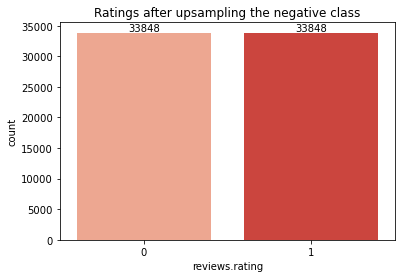

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df2["reviews.rating"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('Ratings after upsampling the negative class')
plt.show()

In [7]:
# time for exploratory analysis and preprocessing
# Let's see how many nan values in our data frame
print(df2.isna().sum())

reviews.text      1
reviews.rating    0
dtype: int64


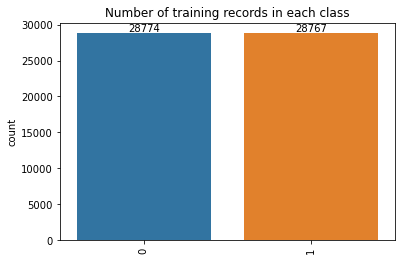

In [8]:
# split the data into training and validation subsets.

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df2[["reviews.text"]], df2["reviews.rating"].values, test_size=0.15, shuffle=True)

#plot
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=y_train, y = None)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.xticks(rotation=90)
plt.title('Number of training records in each class')
plt.show()

In [9]:
# time to pre-process the data. I will remove stopwords and apply stemming using NLTK

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt', download_dir='/tmp/')
nltk.download('stopwords', download_dir='/tmp/')
nltk.data.path.append("tmp")

snow = SnowballStemmer('english') 
stop = stopwords.words('english')

#excluding some useful words from stop words list
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
            "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
            
stop_words = [words for words in stop if words not in excluding]

def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        filtered_sentence=[]
        sent = sent.lower()
        for w in word_tokenize(sent):
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        str1 = " ".join(filtered_sentence) #final string of cleaned words

        final_text_list.append(str1)
    return final_text_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /tmp/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /tmp/...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
print("Pre-process training dataset")
X_train_text_processed = process_text(X_train["reviews.text"].values.astype(str)) 

Pre-process training dataset


In [11]:
print("Pre-process validation dataset")
X_val_text_processed = process_text(X_val["reviews.text"].values.astype(str))

Pre-process validation dataset


In [12]:
# time for text vectorization (extracting features out from text)

# I will use Naive Bayes algorithm's CountVectorizer(), 
# I will also experiment with max_features and ngram parameters.

from sklearn.feature_extraction.text import CountVectorizer

#Text -> Uni gram count Vectors
tf_vectorizer = CountVectorizer(max_features=9500, ngram_range=(1, 2)) 
tf_vectorizer.fit(X_train_text_processed)
X_train = tf_vectorizer.transform(X_train_text_processed)
print("Training Data Size: ", X_train.shape)

X_val = tf_vectorizer.transform(X_val_text_processed)
print("Validation Data Size: ", X_val.shape)

Training Data Size:  (57541, 9500)
Validation Data Size:  (10155, 9500)


In [13]:
# time for model training then testing accuracy on validation data
# Naive Bayes is fast, and useful as a baseline to compare and judge other algorithms.

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train.toarray(), y_train)

y_val_pred = nb.predict(X_val.toarray())

print(classification_report(y_val, y_val_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5074
           1       0.91      0.95      0.93      5081

    accuracy                           0.93     10155
   macro avg       0.93      0.93      0.93     10155
weighted avg       0.93      0.93      0.93     10155



In [14]:
# Confusion matrix to calculate all the metrics from the classification_report

from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_val_pred)

array([[4569,  505],
       [ 253, 4828]], dtype=int64)